# Домашнее задание 2

Используя датасет [STUDENT ALCOHOL CONSUMPTION](https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION#) и статью "USING	DATA	MINING	TO	PREDICT	SECONDARY SCHOOL	STUDENT	ALCOHOL	CONSUMPTION" выполните следующие задания:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Предобработка (Max 2)
- Приведите описание признаков датасета на русском языке с указанием типа данных (0.3 балла)
- Предобработка данных (1.7)
    - Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями (0.4)
    - Подсчитайте количество людей, у которых матери с образованием "0" (0.4)
    - Преобразуйте все номинальные признаки в несколько признаков с бинарным значение (0.4)
    - Используя объект [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) с параметром [f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)  выберите два признака, которые наиболее сильно связаны с признаком G3 (0.5)

In [2]:
descr = open('data/student.txt')
for i in descr:
    print(i)

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

2 sex - student's sex (binary: "F" - female or "M" - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: "U" - urban or "R" - rural)

5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_

## Перевод:
### student-por.csv (Студенты курса португальского языка). Описание датасета:
1. **school** - Школа (Бинарный признак: "GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)<br>
2. **sex** - Пол (Бинарный признак: "F" - женский или "M" - мужской)
3. **age** - Возраст (Порядковый признак: от 15 до 22)
4. **address** - Тип места проживания (Бинарный признак: "U" - Город или "R" - Деревня)
5. **famsize** - Размер семьи (Бинарный признак: "LE3" - (<=3) человек или "GT3" - (>3) человек)
6. **Pstatus** - Совместная жизнь супругов-родителей (Бинарный признак: "T" - живут вместе или "A" - живут раздельно)
7. **Medu** - Образование матери (Порядковый признак: 0 - Без образования, 1 - начальное образование (до 4го класса), 2 – с 5го по 6й класс, 3 – среднее образование or 4 – высшее образование)
8. **Fedu** - Образование отца (Порядковый признак: 0 - Без образования, 1 - начальное образование (до 4го класса), 2 – с 5го по 6й класс, 3 – среднее образование or 4 – высшее образование)
9. **Mjob** - Работа матери (Номинальный признак: "teacher", "health" если относится к уходу, гражданские "services" (e.g. администрация или полиция), "at_home" или "other")
10. **Fjob** - Работа отца (Номинальный признак: "teacher", "health" если относится к уходу, гражданские "services" (e.g. администрация или полиция), "at_home" или "other")
11. **reason** - Причина поступления в данную школу (Номинальный признак: близко к "home", школьная "reputation", "course" предпочтения или "other")
12. **guardian** - опекун (Номинальный признак: "mother", "father" or "other")
13. **traveltime** - Время от дома до школы (Порядковый признак: 1 - 1 hour)
14. **studytime** - Время, которое тратится на обучение в неделю (Порядковый признак: 1 - 10 hours)
15. **failures** - Несданные предметы (Порядковый признак: n if 1<=n<3, else 4)
16. **schoolsup** - Школьная поддержка отстающих в учебе учеников (Бинарный признак: yes или no)
17. **famsup** - Семейная поддержка по учебе (Бинарный признак: yes or no)
18. **paid** - Дополнительные оплачиваемые классы по предметам курса (Бинарный признак: yes or no)
19. **activities** - Внеклассные занятия (Бинарный признак: yes or no)
20. **nursery** - Поступление в детский сад (Бинарный признак: yes or no) (Боже, я думал это врачебная помощь)
21. **higher** - Желание получить высшее образование (Бинарный признак: yes or no)
22. **internet** - Наличие интернета дома (Бинарный признак: yes or no)
23. **romantic** - Тратит ли свою жизнь на девушек (Бинарный признак: yes or no)
24. **famrel** - Качество семейных отношений (Порядковый признак: from 1 - очень плохие to 5 - очешуительные)
25. **freetime** - Обьем свободного времени после школы (Порядковый признак: from 1 - очень мало to 5 - очень много)
26. **goout** - Прогулки с друзьями (частота кажется) (Порядковый признак: from 1 - очень низко to 5 - очень высоко)
27. **Dalc** - Потребление алкоголя в течение рабочего дня (Порядковый признак: from 1 - очень низкое to 5 - очень высокое)
28. **Walc** - Потребление алкоголя в выходные дни (Порядковый признак: from 1 - очень низкое to 5 - очень высокое)
29. **health** - Состояние здоровья на данный момент (Порядковый признак: from 1 - очень бэд to 5 - очень гуд)
30. **absences** - Количество пропусков школки (Порядковый признак: from 0 to 93)
31. **G1** - Оценка в первом учебном году (Порядковый признак: from 0 to 20)
32. **G2** - Оценка во втором учебном году (Порядковый признак: from 0 to 20)
33. **G3** - Результирующая оценка (Порядковый признак: from 0 to 20, выходной таргет)

In [3]:
# было решено смотреть данные только из таблицы с большим числом обьектов.
data_por = pd.read_csv('data/student-por.csv', sep=';')

In [4]:
data_por.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [5]:
data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [6]:
data_por[data_por.isnull().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


### No NaNs detected!

Проверил на пропуски с помощью isnull().any(axis=1). Явных пропусков выявлено не было. 
Также на всякий случай прочекал наличие скрытых NaN таких, как цифры -999 в вещественных или целочисленных признаках. Глянул поля min и max в describe() - скрытых пропусков не обнаружил.

Если почитать внимательно статью, то можно обнаружить следущий абзац:<p></p>
![NaNs in paper](https://github.com/BobrG/IreneGit/blob/master/data/nans_hw2_boosting.png?raw=true)

### Посчитаем число матерей без образования.
(и пусть нам это дальше не пригодится....)

In [7]:
data_por[data_por['Medu'] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
127,GP,F,19,U,GT3,T,0,1,at_home,other,...,3,4,2,1,1,5,0,9,10,11
281,GP,M,16,U,GT3,T,0,2,other,other,...,4,3,2,2,4,5,0,11,12,11
375,GP,F,17,U,LE3,T,0,2,at_home,at_home,...,3,3,3,2,3,2,0,14,14,15
437,MS,F,16,R,GT3,T,0,2,other,other,...,3,2,3,1,2,2,0,12,11,12
493,MS,F,17,U,GT3,T,0,1,other,at_home,...,2,4,4,3,5,5,5,9,9,10
584,MS,F,17,R,GT3,T,0,0,at_home,other,...,4,4,3,1,1,5,0,10,11,11


Найдено 6 обьектов. 
Ответ 6.

Binary and Categorial features to transform:
* school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)<p></p>

* sex - student's sex (binary: "F" - female or "M" - male)<p></p>

* address - student's home address type (binary: "U" - urban or "R" - rural)<p></p>

* famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)<p></p>

* Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)<p></p>

* Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")<p></p>

* Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")<p></p>

* reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")<p></p>

* guardian - student's guardian (nominal: "mother", "father" or "other")<p></p>

* schoolsup - extra educational support (binary: yes or no)<p></p>

* famsup - family educational support (binary: yes or no)<p></p>

* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<p></p>

* activities - extra-curricular activities (binary: yes or no)<p></p>

* nursery - attended nursery school (binary: yes or no)<p></p>

* higher - wants to take higher education (binary: yes or no)<p></p>

* internet - Internet access at home (binary: yes or no)<p></p>

* romantic - with a romantic relationship (binary: yes or no)<p></p>


In [8]:
def convert_to_binary(d, strg):
    d[strg] = d[strg].astype('category')
    d[strg] = d[strg].cat.codes
tmp = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid',
      'activities', 'nursery', 'higher', 'internet', 'romantic']

In [9]:
[convert_to_binary(data_por, i) for i in tmp]
data_por = pd.get_dummies(data_por, columns=['Mjob', 'Fjob', 'reason', 'guardian'])

In [10]:
data_por.dtypes

school                int8
sex                   int8
age                  int64
address               int8
famsize               int8
Pstatus               int8
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup             int8
famsup                int8
paid                  int8
activities            int8
nursery               int8
higher                int8
internet              int8
romantic              int8
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
F

In [11]:
from sklearn.feature_selection import SelectKBest, f_regression
data_best = SelectKBest(f_regression, k=2).fit_transform(data_por.drop('G3', axis=1), data_por['G3'])

In [12]:
print(data_best.shape)
data_best[0:3]

(649, 2)


array([[ 0, 11],
       [ 9, 11],
       [12, 13]])

In [13]:
for i in data_por.columns:
    print(i, '-', data_por[i].head(3).values)

school - [0 0 0]
sex - [0 0 0]
age - [18 17 15]
address - [1 1 1]
famsize - [0 0 1]
Pstatus - [0 1 1]
Medu - [4 1 1]
Fedu - [4 1 1]
traveltime - [2 1 1]
studytime - [2 2 2]
failures - [0 0 0]
schoolsup - [1 0 1]
famsup - [0 1 0]
paid - [0 0 0]
activities - [0 0 0]
nursery - [1 0 1]
higher - [1 1 1]
internet - [0 1 1]
romantic - [0 0 0]
famrel - [4 5 4]
freetime - [3 3 3]
goout - [4 3 2]
Dalc - [1 1 2]
Walc - [1 1 3]
health - [3 3 3]
absences - [4 2 6]
G1 - [ 0  9 12]
G2 - [11 11 13]
G3 - [11 11 12]
Mjob_at_home - [1 1 1]
Mjob_health - [0 0 0]
Mjob_other - [0 0 0]
Mjob_services - [0 0 0]
Mjob_teacher - [0 0 0]
Fjob_at_home - [0 0 0]
Fjob_health - [0 0 0]
Fjob_other - [0 1 1]
Fjob_services - [0 0 0]
Fjob_teacher - [1 0 0]
reason_course - [1 1 0]
reason_home - [0 0 0]
reason_other - [0 0 1]
reason_reputation - [0 0 0]
guardian_father - [0 1 0]
guardian_mother - [1 0 1]
guardian_other - [0 0 0]


### SelectKBest выбрал G1 и G2 как лучшие признаки для предсказания G3;
*что в принципе не более чем очевидно*

### Регрессия (Max 4)
Выберите один признак, который наиболее влияет на признак G3 и используя кросс-валидацию (cross-validation) выполните следующее:

- На обучающей выборке обучите объект [RidgeСV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) для различных alpha (0.2)
- Выберите alpha при котором RidgeCV лучше всего предсказывает значения (0.1)
- Подсчитайте метрику mean absolute error, mean squared error, median absolute error,r2 score(0.2)
<p></p>Max (0.5)
- ------------------------------------
- Создайте объекты [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor), используя все возможных варианты аргумента penalty (0.2)
- Обучите все полученных объекты на обучающей выборке (0.1)
- Подсчитайте метрику r2 score для всех объектов (0.2)
<p></p>Max (0.5)
- ------------------------------------
- Создайте объекты с параметрами max_depth = 1,3, 10 [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) и для каждого объекта изменяйте количество n_estimators  от 100 до 1000 с шагом 100 (0.2)
- Подсчитайте метрику r2 score для всех объектов (0.1)
- Визуализируйте зависимость R2 oт n_estimators на графике (0.2)
<p></p>Max (0.5)
- -----------------------------------
- Используя все доступные регрессоры в библиотеке sklearn, найдите самый лучший регрессор. (2.5)

**Выберем наиболее влиятельный на G3 признак**

In [14]:
print(np.corrcoef(data_best[:, 0], data_por['G3'])[1, 0])
print(np.corrcoef(data_best[:, 1], data_por['G3'])[1, 0])

0.826387124789
0.91854800356


Возьмем фичу у которой больше коэффициент корреляции с целевой переменной.

In [15]:
X = data_best[:,1].reshape(-1, 1)
y = data_por['G3']

# RidgeCV

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
rcv = RidgeCV(alphas=np.logspace(-3, 2, 10))
rcv.fit(X_train, y_train)

RidgeCV(alphas=array([  1.00000e-03,   3.59381e-03,   1.29155e-02,   4.64159e-02,
         1.66810e-01,   5.99484e-01,   2.15443e+00,   7.74264e+00,
         2.78256e+01,   1.00000e+02]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [75]:
rcv.alpha_

2.1544346900318843

In [76]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
y_pred = rcv.predict(X_test)
print('mean absolute error:', mean_absolute_error(y_pred, y_test))
print('meadian absolute error:', median_absolute_error(y_pred, y_test))
print('mean squared error:', mean_squared_error(y_pred, y_test))
print('r2 score:', r2_score(y_pred, y_test))

mean absolute error: 0.724646621942
meadian absolute error: 0.548926761619
mean squared error: 1.2299513226
r2 score: 0.882387967699


### Лучший alpha=2.1544346900318843

# SGDRegressor

In [77]:
from sklearn.linear_model import SGDRegressor
sgdr1 = SGDRegressor(penalty='none')
sgdr2 = SGDRegressor(penalty='l1')
sgdr3 = SGDRegressor(penalty='l2')
sgdr4 = SGDRegressor(penalty='elasticnet')

/home/bobrg/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [78]:
sgdr1.fit(X_train, y_train);
sgdr2.fit(X_train, y_train);
sgdr3.fit(X_train, y_train);
sgdr4.fit(X_train, y_train);

In [79]:
Y_pred_1 = sgdr1.predict(X_test)
Y_pred_2 = sgdr2.predict(X_test)
Y_pred_3 = sgdr3.predict(X_test)
Y_pred_4 = sgdr4.predict(X_test)
print('penalty=none r2 score:', r2_score(Y_pred_1, y_test))
print('penalty=l1 r2 score:', r2_score(Y_pred_2, y_test))
print('penalty=l2 r2 score:', r2_score(Y_pred_3, y_test))
print('penalty=elasticnet r2 score:', r2_score(Y_pred_4, y_test))

penalty=none r2 score: 0.881307260792
penalty=l1 r2 score: 0.878500064626
penalty=l2 r2 score: 0.881544786312
penalty=elasticnet r2 score: 0.881373770012


### Best parameter - penalty=l2

# GradientBoostingRegressor

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
r2_score_1 = np.zeros((10, 2))
r2_score_2 = np.zeros((10, 2))
r2_score_3 = np.zeros((10, 2))
for i in np.arange(100, 1100, 100):
    gbr1 = GradientBoostingRegressor(max_depth=1, n_estimators=i)
    gbr2 = GradientBoostingRegressor(max_depth=3, n_estimators=i)
    gbr3 = GradientBoostingRegressor(max_depth=10, n_estimators=i)
    gbr1.fit(X_train, y_train)
    gbr2.fit(X_train, y_train)
    gbr3.fit(X_train, y_train)
    r2_score_1[i//100 - 1] = [r2_score(gbr1.predict(X_test), y_test), i]
    r2_score_2[i//100 - 1] = [r2_score(gbr2.predict(X_test), y_test), i]
    r2_score_3[i//100 - 1] = [r2_score(gbr3.predict(X_test), y_test), i]

In [82]:
r2_score_maxes = [r2_score_1[r2_score_1[:, 0].argmax()],
                  r2_score_2[r2_score_2[:, 0].argmax()],
                  r2_score_3[r2_score_3[:, 0].argmax()]]

In [83]:
print(r2_score_maxes)

[array([   0.85400498,  200.        ]), array([   0.85118801,  600.        ]), array([   0.85118801,  400.        ])]


### Best parameter - max_depth=1, n_estimators=200

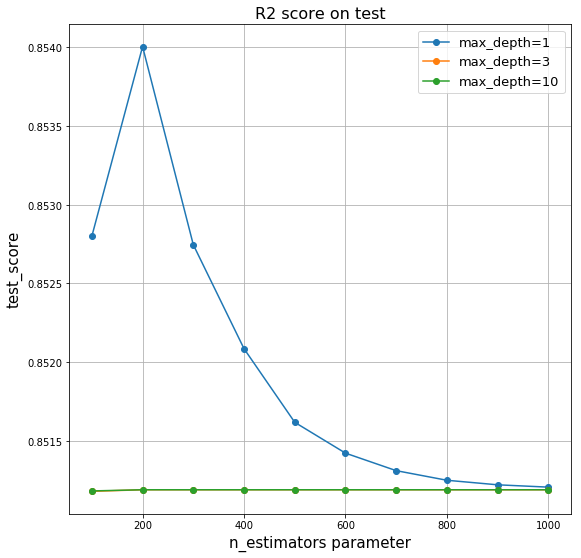

In [84]:
fig = plt.figure(figsize=(9, 9))
plt.plot(r2_score_1[:, 1], r2_score_1[:, 0], '-o', label='max_depth=1')
plt.plot(r2_score_2[:, 1], r2_score_2[:, 0], '-o', label='max_depth=3')
plt.plot(r2_score_3[:, 1], r2_score_3[:, 0], '-o', label='max_depth=10')
plt.legend(fontsize=13)
plt.grid('on')
plt.title('R2 score on test', fontsize=16)
plt.ylabel('test_score', fontsize=15)
plt.xlabel('n_estimators parameter', fontsize=15)

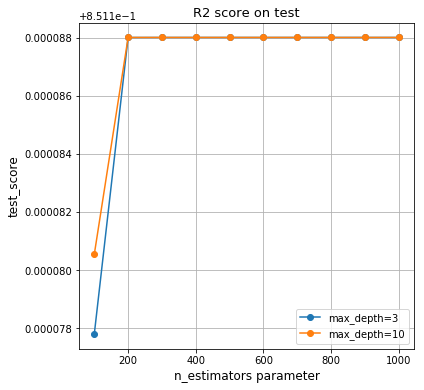

In [85]:
fig = plt.figure(figsize=(6,6))
plt.plot(r2_score_2[:, 1], r2_score_2[:, 0], '-o', label='max_depth=3')
plt.plot(r2_score_3[:, 1], r2_score_3[:, 0], '-o', label='max_depth=10')
plt.legend(fontsize=10)
plt.grid('on')
plt.title('R2 score on test', fontsize=13)
plt.ylabel('test_score', fontsize=12)
plt.xlabel('n_estimators parameter', fontsize=12)

### Выберем лучший регрессор.

In [86]:
print(mean_squared_error(rcv.predict(X_test), y_test))

1.2299513226


In [89]:
print(mean_squared_error(sgdr3.predict(X_test), y_test))

1.2358695136


In [88]:
gbr = GradientBoostingRegressor(max_depth=1, n_estimators=100)
gbr.fit(X_train, y_train)
print(mean_squared_error(gbr.predict(X_test), y_test))

1.37208158438


# Лучший регрессор - RidgeCV с alpha=2.1544346900318843 

### Классификация (Max 4)
- В статье описано использование Random Forest для предсказания важности факторов, влияющих на потребление алкоголя. Повторите эксперимент с использование объекта [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) и найдите наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)
- Обучите объект [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)  и найдите для него наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)
- Обучите объект [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)  и найдите для него наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)
- Найдите наилучший классификатор. Укажите accuracy для наилучших параметров (2.5)

**Введем целевую переменную описывающую потребление алкоголя студентом. Бинаризируем ее по границе 3.
Данные действия делаем в соответствии со статьей.**

In [32]:
y_alc = (data_por['Dalc']*5 + data_por['Walc']*2) / 7
y_alc = [int(y<3) for y in y_alc]
data_por.drop(['Dalc', 'Walc'], axis=1, inplace=True)

**Backward Feature Elimination.**<p></p>
In this technique, at a given iteration, the selected classification algorithm is trained on n input features. Then we remove one input feature at a time and train the same model on n-1 input features n times. The input feature whose removal has produced the smallest increase in the error rate is removed, leaving us with n-1 input features. The classification is then repeated using n-2 features, and so on. Each iteration k produces a model trained on n-k features and an error rate e(k). Selecting the maximum tolerable error rate, we define the smallest number of features necessary to reach that classification performance with the selected machine learning algorithm.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score 
data_tmp = data_por
for j in data_tmp.columns: 
    bfe_score = {}
    rfc = RandomForestClassifier(n_jobs=-1,random_state=42)
    input_score = cross_validate(rfc, data_tmp, y_alc, cv=3)['test_score'].mean()
    print('start score', input_score)
    for i in data_tmp.columns:
        tmp = data_tmp.drop(i, axis=1)
        bfe_score[i] = cross_validate(rfc, tmp, y_alc, cv=3)['test_score'].mean() - input_score 
    this = max(bfe_score)

    print('----------------------------------------')
    print(bfe_score[this])
    print(this)
    if (bfe_score[this] < 0):    
        break
    print('dropping', this)
    print('score after dropping feature', bfe_score[this] + input_score)
    data_tmp.drop(this, axis=1, inplace=True)
    if len(data_tmp.columns) == 6:
        break

start score 0.745555271093
----------------------------------------
0.0864197530864
traveltime
dropping traveltime
score after dropping feature 0.831975024179
start score 0.831975024179
----------------------------------------
-0.00926637082551
studytime


**Жадный отбор дропнул одну фичу и слегка улучшил скор. Дальше отброс фич только уменьшал скор.**

## Найдем лучшие параметры RandomForest.

In [34]:
data_por = data_tmp

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion' : ('gini', 'entropy'), 'max_depth':(1,3,5,8,11,17,20),
              'n_estimators': np.arange(10, 400, 100)}
rfc = RandomForestClassifier(n_jobs=-1,random_state=42)
gcv = GridSearchCV(rfc, param_grid=param_grid, scoring='accuracy', cv=4)
gcv.fit(data_por, y_alc)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': (1, 3, 5, 8, 11, 17, 20), 'criterion': ('gini', 'entropy'), 'n_estimators': array([ 10, 110, 210, 310])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [36]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 1, 'criterion': 'gini', 'n_estimators': 10}
0.884437596302


## Найдем лучшие параметры GradientBoostingClassifier.

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'loss' : ('deviance', 'exponential'),
    'learning_rate': (0.0001, 0.001, 0.1, 1.0, 10, 100),
    'n_estimators':np.arange(10,200,50),
    'max_depth':(1,5,8,10,20)}
gbc = GradientBoostingClassifier()
gcv = GridSearchCV(gbc, param_grid=param_grid, scoring='accuracy', cv=4)
gcv.fit(data_por, y_alc)

GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': (0.0001, 0.001, 0.1, 1.0, 10, 100), 'max_depth': (1, 5, 8, 10, 20), 'loss': ('deviance', 'exponential'), 'n_estimators': array([ 10,  60, 110, 160])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [38]:
print(gcv.best_params_)
print(gcv.best_score_)

{'learning_rate': 0.1, 'max_depth': 1, 'loss': 'exponential', 'n_estimators': 60}
0.88906009245


## Найдем лучшие параметры AdaBoostClassifier.

In [39]:
from sklearn.ensemble import AdaBoostClassifier
abc_params = {'n_estimators': np.arange(10, 100, 20), 'learning_rate': (0.01, 0.1, 1.0, 10.0)}
abc = AdaBoostClassifier()
gcv = GridSearchCV(abc, param_grid=abc_params, scoring='accuracy', cv=4)
gcv.fit(data_por, y_alc)

GridSearchCV(cv=4, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': (0.01, 0.1, 1.0, 10.0), 'n_estimators': array([10, 30, 50, 70, 90])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [40]:
print(gcv.best_params_)
print(gcv.best_score_)

{'learning_rate': 0.1, 'n_estimators': 90}
0.890600924499


## Лучший классификатор
## GradientBoostingClassifier.
### со скором ~ 89% и параметрами 'learning_rate': 0.1, 'n_estimators': 60, 'loss': 'exponential',<br>'max_depth': 1
Хотя кажется у модели AdaBoostClassifier ~ такой же результат с параметрами learning_rate: 0.1 и n_estimators 90.

# Замечания

- В работе следует использовать библиотеку scikit-learn версии 0.18 и scipy версии 0.18.1